In [11]:
import matplotlib.pyplot as plt
import visual_behavior.utilities as vbu
import visual_behavior.database as db
from visual_behavior.data_access import loading
from allensdk.brain_observatory.behavior.behavior_ophys_session import BehaviorOphysSession

## find all ophys session IDs for a given animal

In [31]:
filtered_experiment_table = loading.get_filtered_ophys_experiment_table()

osids = filtered_experiment_table.query('specimen_id == 850862430')['ophys_session_id'].unique()
osids

array([952430817, 954954402, 955775716, 957020350, 958105827, 958772311,
       959458018, 951410079])

## Use the VBA EyeTrackingData class to load eye tracking data into a dictionary where the keys are OSIDs

In [32]:
eye_data = {}
for osid in osids:
    eye_data[osid] = vbu.EyeTrackingData(osid)

/home/dougo/.conda/envs/visual_behavior/lib/python3.8/site-packages/scipy-1.5.0rc1-py3.8-linux-x86_64.egg/scipy/stats/stats.py:2500: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


## imshow a single frame from each session

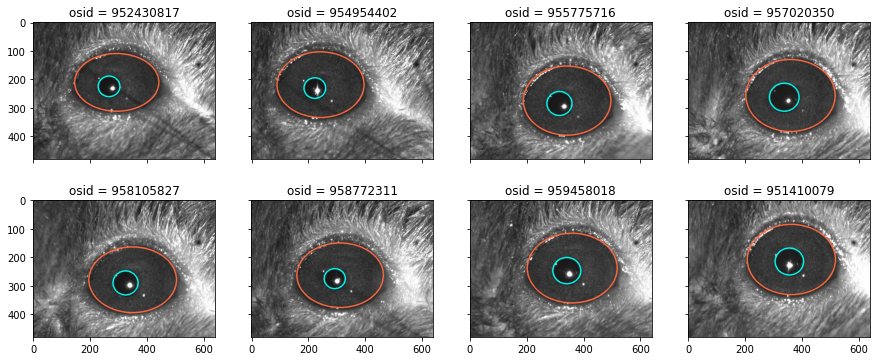

In [48]:
n_cols=4
n_rows = int(np.ceil(len(osids)/4))
fig,ax=plt.subplots(n_rows,n_cols,figsize=(15,3*n_rows),sharex=True,sharey=True)


for ii,osid in enumerate(osids):
    frame = eye_data[osid].get_annotated_frame(10000)
    ax.flatten()[ii].imshow(frame)
    ax.flatten()[ii].set_title('osid = {}'.format(osid))